# Colour maps by value (matplotlib)

This notebook shows an example of creating a map in matplotlib where each region is drawn in a different colour to match a given value.

In this example we will plot the travel time from each LSOA to a chosen stroke unit.

## Notebook setup

In [1]:
import stroke_maps.load_data
import stroke_maps.catchment

import pandas as pd
import matplotlib.pyplot as plt

## Load data

First, load the LSOA boundaries:

In [2]:
gdf_lsoa = stroke_maps.load_data.lsoa_geography()

gdf_lsoa.head(3)

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry
0,1,E01000001,City of London 001A,City of London 001A,532129,181625,-0.09706,51.51810,157794.481079,1685.391778,b12173a3-5423-4672-a5eb-f152d2345f96,"POLYGON ((-0.09474 51.52060, -0.09546 51.51544..."
1,2,E01000002,City of London 001B,City of London 001B,532480,181699,-0.09197,51.51868,164882.427628,1804.828196,90274dc4-f785-4afb-95cd-7cc1fc9a2cad,"POLYGON ((-0.08810 51.51941, -0.09546 51.51544..."
2,3,E01000003,City of London 001C,City of London 001C,532245,182036,-0.09523,51.52176,42219.805717,909.223277,7e89d0ba-f186-45fb-961c-8f5ffcd03808,"POLYGON ((-0.09453 51.52205, -0.09274 51.52139..."


Then load the travel time data.

This dataframe contains one row for each LSOA in England and Wales. There is one column for each stroke unit in England and Wales. The value in each cell is the time from that row's LSOA to that column's stroke unit.

In [3]:
df_travel_lsoa = stroke_maps.load_data.travel_time_matrix_lsoa()

# Show the first five rows and columns:
df_travel_lsoa.iloc[:5, :5]

,B152TH,B714HJ,B95SS,BA13NG,BA214AT
LSOA,,,,,
Adur 001A,173.3,179.8,171.2,161.5,152.9
Adur 001B,173.3,179.8,172.3,161.5,152.9
Adur 001C,173.3,180.9,172.3,150.8,151.9
Adur 001D,173.3,180.9,172.3,161.5,152.9
Adur 001E,174.4,180.9,173.3,150.8,151.9


Also import the stroke unit coordinates for the map.

In [10]:
gdf_units = stroke_maps.load_data.stroke_unit_coordinates()

## Create value for colour

In this case we'll use the travel time to the nearest stroke unit.

In [4]:
df_catchment = stroke_maps.catchment.find_nearest_unit(df_travel_lsoa)

df_catchment.head(5)

,unit_travel_time,unit_postcode
LSOA,,
Adur 001A,17.6,BN25BE
Adur 001B,18.7,BN112DH
Adur 001C,17.6,BN112DH
Adur 001D,17.6,BN112DH
Adur 001E,16.5,BN112DH


Merge this into the geography data:

In [8]:
gdf_lsoa = pd.merge(gdf_lsoa, df_catchment, left_on='LSOA11NM', right_index=True, how='right')

gdf_lsoa.head(3).T

,30556.0,30557.0,30558.0
OBJECTID,30557.0,30558.0,30559.0
LSOA11CD,E01031349,E01031350,E01031351
LSOA11NM,Adur 001A,Adur 001B,Adur 001C
LSOA11NMW,Adur 001A,Adur 001B,Adur 001C
BNG_E,524915.0,524825.0,523053.0
BNG_N,105607.0,106265.0,108004.0
LONG,-0.22737,-0.22842,-0.253
LAT,50.83651,50.84244,50.85845
Shape__Area,364103.196278,292173.241409,5281767.618492
Shape__Length,3054.751704,2977.102897,11671.349143


## Make map

Convert the LSOA geometry to British National Grid coordinate system to match the stroke units:

In [14]:
gdf_lsoa = gdf_lsoa.to_crs('EPSG:27700')

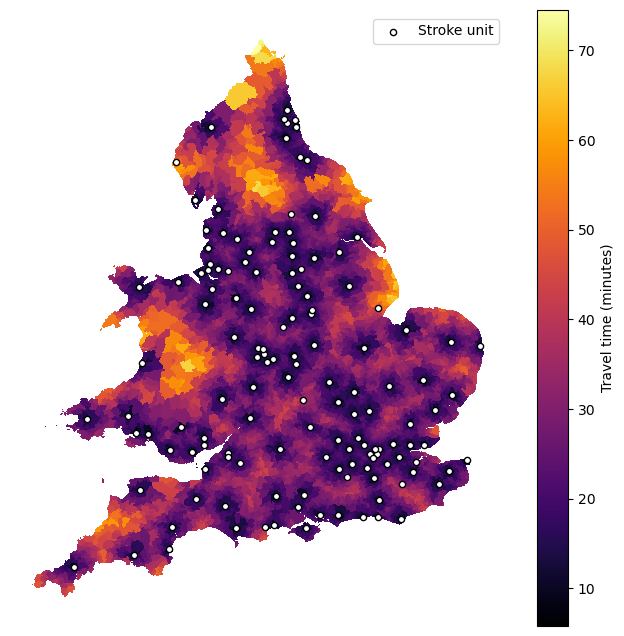

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))

# Catchment areas:
gdf_lsoa.plot(
    ax=ax,              # Set which axes to use for plot
    antialiased=False,  # Avoids artefact boundary lines
    column='unit_travel_time',  # set colours using this column
    cmap='inferno',
    legend=True,  # to draw colourbar
    legend_kwds={"label": 'Travel time (minutes)'}
    )

# Stroke units:
ax.scatter(
    gdf_units['geometry'].x,
    gdf_units['geometry'].y,
    marker='o',
    facecolor='w',
    edgecolor='k',
    label='Stroke unit',
    s=20,  # size
    )

# Remove the axis border, ticks, labels...
ax.axis('off')

# Add legend:
ax.legend()

plt.show()